In [1]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-06-10 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Notebook containing preprocessing, visualisations and graph creations-*-

# <center> EE - 452: Network Machine Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Bookreads recommenders </center>
---

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
from tqdm import tqdm

ratings = pd.read_csv( 'data/ratings.csv' )
tr = pd.read_csv( 'data/to_read.csv' )
b = pd.read_csv( 'data/books.csv' )

t = pd.read_csv( 'data/tags.csv' )
bt = pd.read_csv( 'data/book_tags.csv')

In [80]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

# Data Preprocessing

In [3]:
# Ratings data
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


<Axes: >

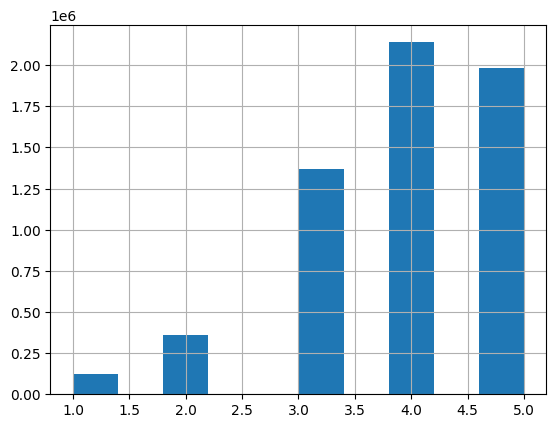

In [4]:
ratings['rating'].hist()

In [5]:
len(ratings)

5976479

In [6]:
# Top 10 books of ratings
ratings['book_id'].value_counts().head(10)


book_id
1     22806
2     21850
4     19088
3     16931
5     16604
17    16549
20    15953
18    15855
23    15657
7     15558
Name: count, dtype: int64

In [7]:
# Top 10 user_id with more ratings 
ratings['user_id'].value_counts()

user_id
12874    200
30944    200
52036    199
12381    199
28158    199
        ... 
32128     21
40753     21
51725     21
43675     20
34590     19
Name: count, Length: 53424, dtype: int64

In [8]:
# Last 10 elements
ratings['user_id'].value_counts().tail(10)


user_id
32960    22
22020    22
25258    22
42736    22
43672    22
32128    21
40753    21
51725    21
43675    20
34590    19
Name: count, dtype: int64

# Graph Creation

##  User to User graph (using ratings as edges)

In [9]:
ratings.book_id.value_counts().head(10)

book_id
1     22806
2     21850
4     19088
3     16931
5     16604
17    16549
20    15953
18    15855
23    15657
7     15558
Name: count, dtype: int64

In [10]:
book_users = defaultdict(set)
for _, row in tqdm(ratings.iterrows(), total=ratings.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

100%|██████████| 5976479/5976479 [02:24<00:00, 41304.88it/s]


In [11]:
max(book_users, key=lambda x: len(book_users[x]))

1

In [12]:
# Quickest 
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

# Sample because it's taking too long

r = ratings.sample(frac=0.1)

book_users = defaultdict(set)

for _, row in tqdm(r.iterrows(), total=r.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

graph = nx.Graph()

for book_id, users in tqdm(book_users.items(), total=len(book_users)):
    user_pairs = combinations(users, 2)
    
    for user_pair in user_pairs:
        graph.add_edge(*user_pair)

print(len(graph.nodes()))
print(len(graph.edges()))

100%|██████████| 10000/10000 [04:55<00:00, 33.79it/s] 


53394
92514512


Each user that rated a book has potentially 53395 connections, but the maximum of books that are rated is 200. So the maximum total of edges would be    200 * 53395 * 53395

In [13]:
graph.nodes()

NodeView((4100, 36873, 12305, 530, 35351, 26135, 536, 52770, 47651, 33331, 50746, 48703, 45634, 44612, 11845, 35910, 5192, 81, 15442, 52313, 32349, 16993, 48225, 38502, 19066, 44162, 20610, 27271, 21133, 8847, 20113, 32920, 7320, 34979, 26789, 28838, 41639, 9383, 49832, 43701, 42169, 21183, 40641, 27841, 21187, 48331, 52431, 24786, 31955, 13525, 4824, 33500, 15074, 52969, 36074, 18155, 48370, 25855, 20234, 28945, 4385, 18210, 2341, 33579, 11053, 18734, 45364, 35646, 23359, 17222, 18777, 350, 45938, 32628, 39800, 8574, 6528, 20354, 11139, 13188, 2437, 33668, 913, 21916, 6051, 18857, 41401, 22472, 19918, 30164, 22491, 17883, 11746, 18916, 18922, 10219, 48106, 17389, 44016, 7665, 12787, 11766, 51195, 22524, 16385, 36866, 16899, 15366, 22536, 17417, 7179, 41484, 33293, 4111, 46097, 19987, 11799, 46108, 9757, 17948, 34335, 26656, 2594, 14376, 49706, 5677, 37935, 20528, 11312, 8754, 11316, 1588, 13366, 51768, 20026, 1082, 35903, 22591, 39489, 6212, 38470, 51271, 2131, 48726, 30815, 26208, 95

In [14]:
ratings.query('user_id == 12874')

,user_id,book_id,rating
786481,12874,306,4
786482,12874,118,4
786483,12874,43,4
786484,12874,943,3
786485,12874,1186,4
...,...,...,...
786728,12874,846,4
786730,12874,4974,4
786731,12874,4244,3
786733,12874,189,4


Mean degree for the first 10 nodes: 9.0
Mean degree for the first 20 nodes: 19.0
Mean degree for the first 30 nodes: 29.0


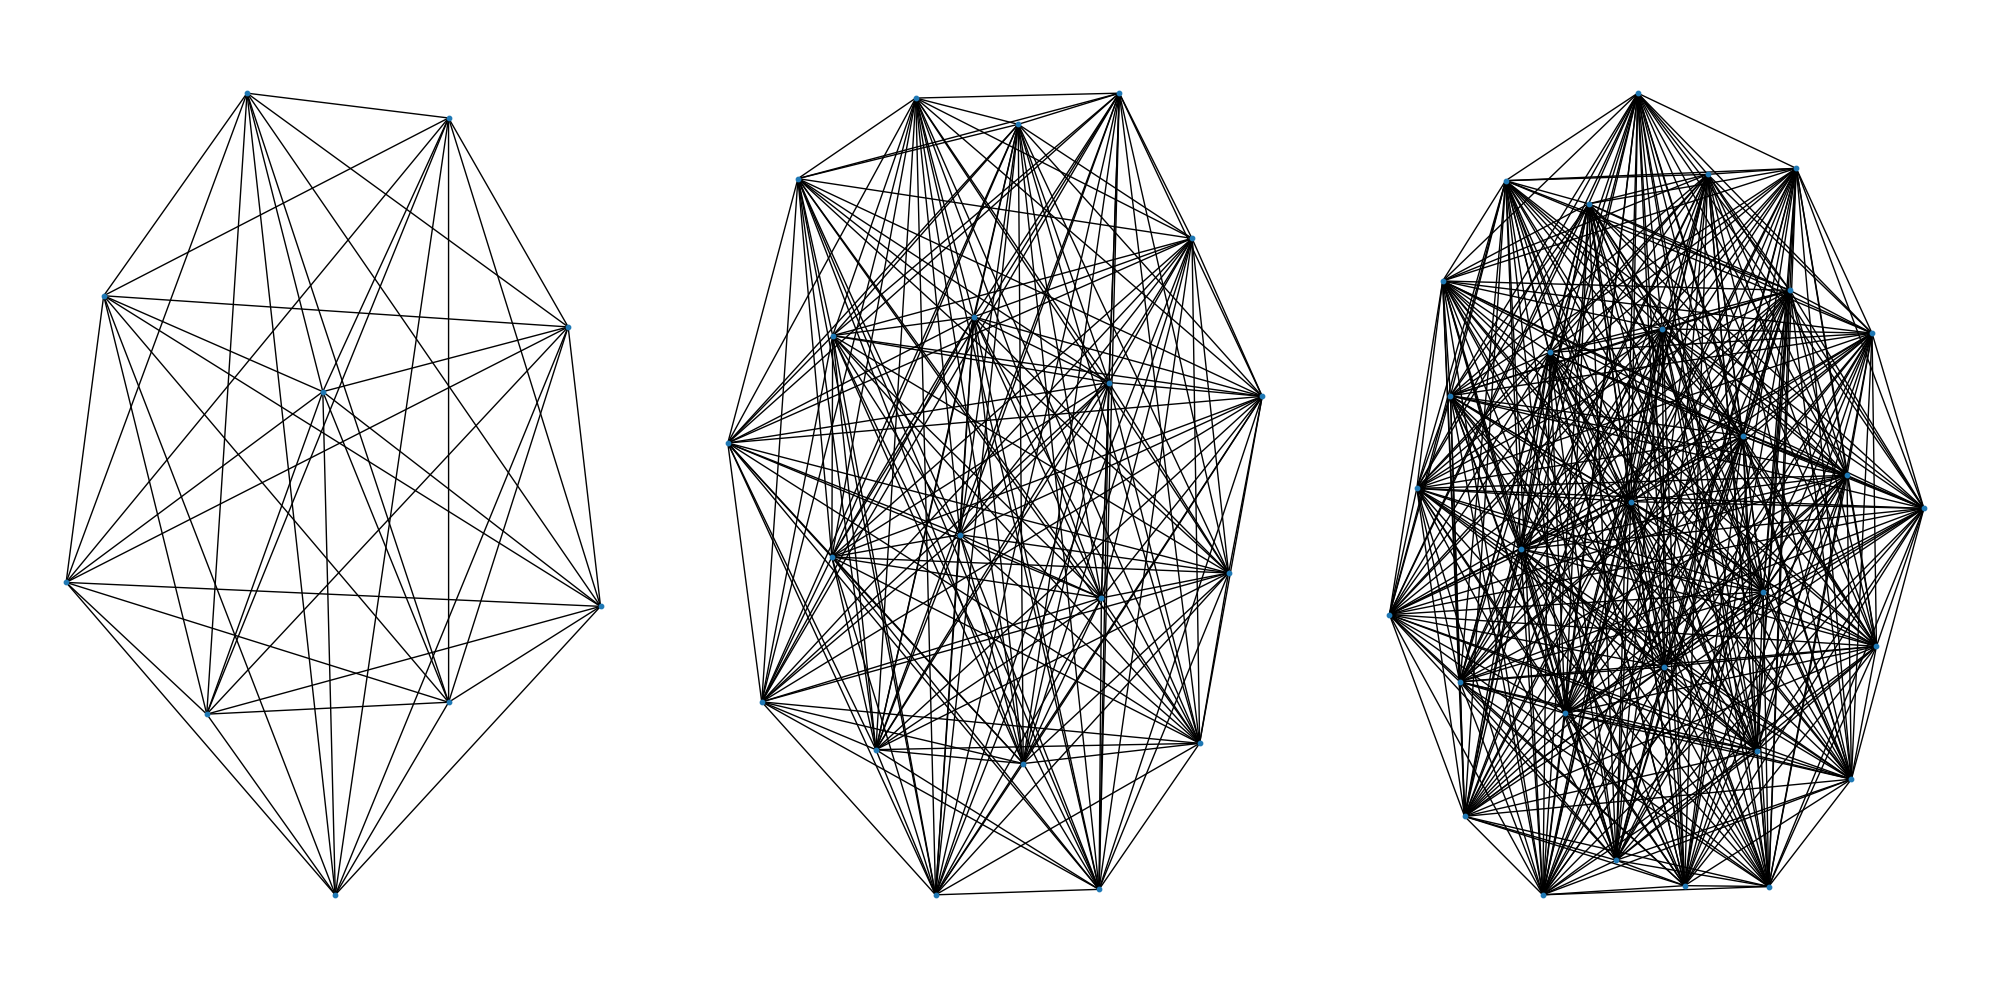

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

sampled_nodes = list(graph.nodes())[:10]

for i in range(3):
    sampled_nodes = list(graph.nodes())[:10 * (i + 1)]
    
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
        
    plt.subplot(1, 3, i + 1)
    
    nx.draw(sampled_graph, with_labels=False, node_size=10)

plt.tight_layout()
plt.show()


Mean degree for the first 10 nodes: 0.4
Mean degree for the first 10 nodes: 0.0
Mean degree for the first 10 nodes: 0.2


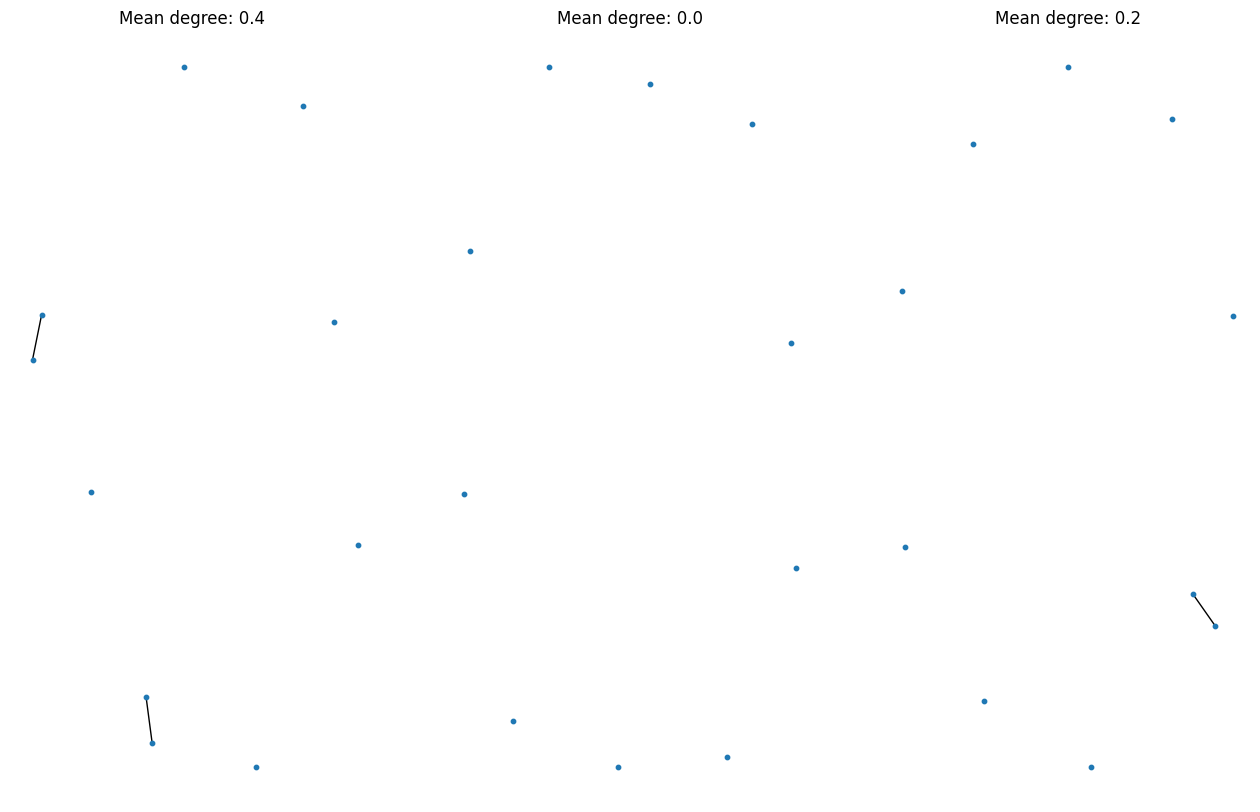

In [16]:
plt.figure(figsize=(16, 10))

for i in range(3):

    sampled_nodes = list(graph.nodes())
    np.random.shuffle(sampled_nodes)
    sampled_nodes = sampled_nodes[:10]

    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph
    plt.subplot(1, 3, i + 1)
    plt.title(f"Mean degree: {mean_degree}")
    nx.draw(sampled_graph, with_labels=False, node_size=10)

In [17]:
# Calculate the mean degree of the nodes in the graph
degree = dict(graph.degree())
mean_degree = np.mean(list(degree.values()))
print(f"Mean degree: {mean_degree}")

Mean degree: 3465.352361688579


In [18]:
# Take the last element
ratings['book_id'].value_counts().index[-1]

7803

In [20]:
# degree of nodes 28672 (most rating's user_id)
print("Degree for the most rating's user_id: " ,degree[28672])

# Check the node degree of node 34590 (less rating's user_id)
print("Degree for the less rating's user_id: " ,degree[34590])


Degree for the most rating's user_id:  1322
Degree for the less rating's user_id:  6


In [21]:
degree = dict(graph.degree())

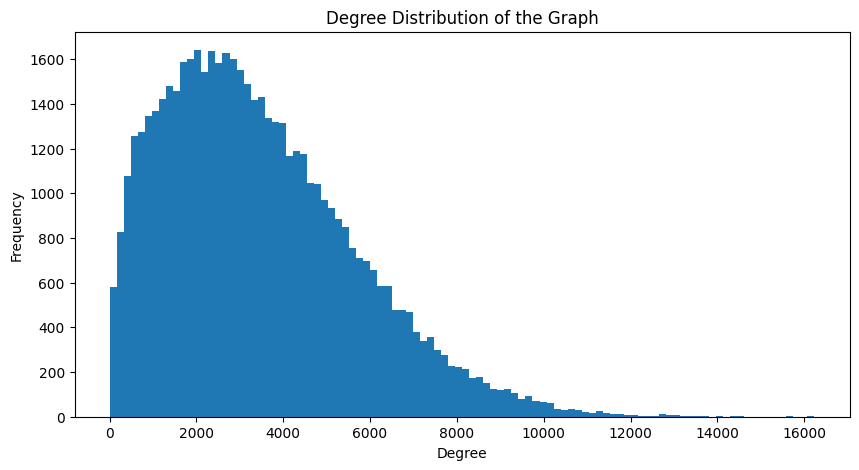

In [22]:
# Plot the degree distribution of the graph
plt.figure(figsize=(10, 5))
plt.hist(degree.values(), bins=100)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()

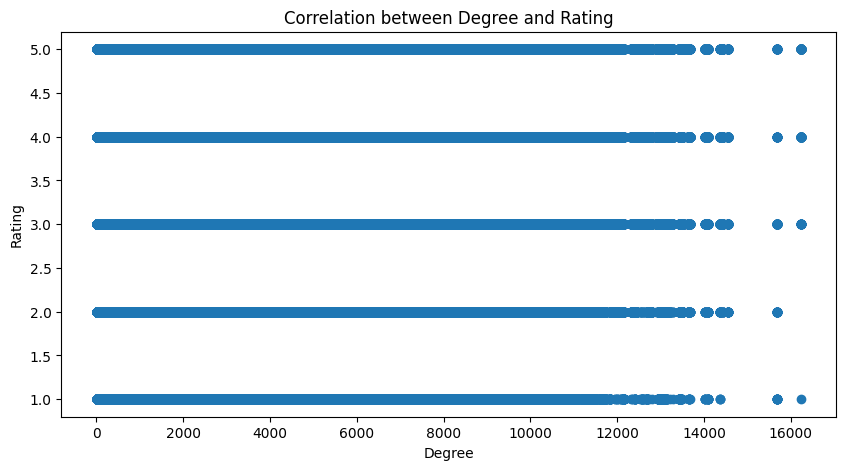

In [23]:
## Is the degree really representative of properties of the nodes in the graph? (Correlation between degree and ratings)

degree_df = pd.DataFrame(list(degree.items()), columns=['node', 'degree'])

ratings_with_degree = ratings.merge(degree_df, left_on='user_id', right_on='node')

ratings_with_degree[['rating', 'degree']].corr()

plt.figure(figsize=(10, 5))
plt.scatter(ratings_with_degree['degree'], ratings_with_degree['rating'])
plt.xlabel('Degree')
plt.ylabel('Rating')
plt.title('Correlation between Degree and Rating')
plt.show()

In [24]:
ratings_with_degree[['rating', 'degree']].corr()


,rating,degree
rating,1.00000,-0.02211
degree,-0.02211,1.00000


- Correlation Coefficient between rating and degree : No linear relation between both
- Negative = slight tendency for the rating to decrease when degree increase (more professional)

In [25]:
import networkx as nx
import random

#Take only the first 1000 edges
edges = list(graph.edges())[:1000]

random.shuffle(edges)

train_size = int(len(edges) * 0.7)  # 70% of the data
G_train_edges = edges[:train_size]
G_test_edges = edges[train_size:]

G_train = graph.edge_subgraph(G_train_edges)
G_test = graph.edge_subgraph(G_test_edges)

## Book to Book graph

## Prediction "To Read"

In [3]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [4]:
tr.shape

(912705, 2)

In [5]:
book_ids = tr['book_id'].nunique()
book_ids

9986

In [6]:
# Check how many times each book has been added to 'to read'
tr['book_id'].value_counts()


book_id
47      2772
143     1967
113     1840
13      1812
11      1767
        ... 
6297       1
7951       1
4434       1
9124       1
8946       1
Name: count, Length: 9986, dtype: int64

In [7]:
# Check how many times a book has only one user who added it to 'to read'
(tr['book_id'].value_counts() < 50).sum()


5641

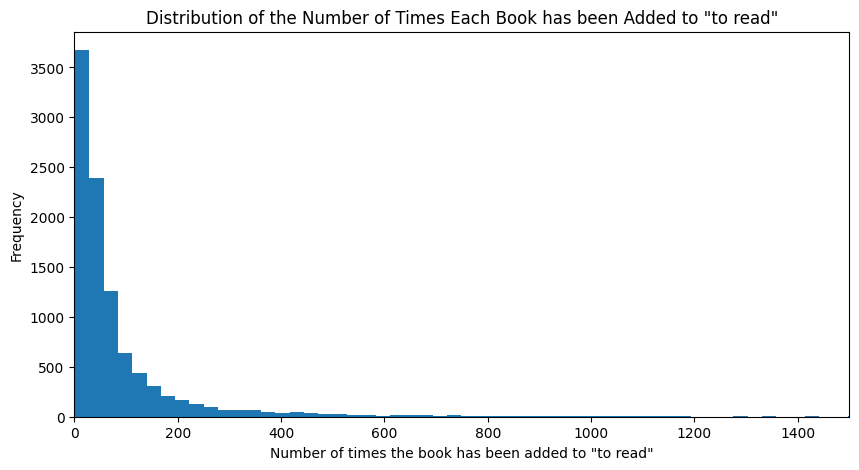

In [8]:
# Plot the distribution of the number of times each book has been added to 'to read'
plt.figure(figsize=(10, 5))
plt.hist(tr['book_id'].value_counts(), bins=100)
plt.xlabel('Number of times the book has been added to "to read"')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Times Each Book has been Added to "to read"')
plt.xlim(0,1500)
plt.show()


In [10]:
# Create a dictionary where the keys are user_ids and the values are sets of book_ids
user_books = defaultdict(set)

for _, row in tqdm(tr.iterrows(), total=tr.shape[0]):
    user_books[row['user_id']].add(row['book_id'])

G_user_books = nx.Graph()

for user_id, books in tqdm(user_books.items(), total=len(user_books)):
    book_pairs = combinations(books, 2)
    
    for book_pair in book_pairs:
        G_user_books.add_edge(*book_pair, user_id=user_id)

print(len(G_user_books.nodes()))
print(len(G_user_books.edges()))


100%|██████████| 48871/48871 [00:27<00:00, 1769.43it/s]

9986
6236948


In [54]:
import random

# Select a random subset of users
user_subset = random.sample(list(user_books.keys()), 100)

G_user_books_sample = nx.Graph()

for user_id in tqdm(user_subset, total=len(user_subset)):
    books = user_books[user_id]
    
    book_pairs = combinations(books, 2)
    
    for book_pair in book_pairs:
        G_user_books_sample.add_edge(*book_pair, user_id=user_id)

print(len(G_user_books_sample.nodes()))
print(len(G_user_books_sample.edges()))

100%|██████████| 100/100 [00:00<00:00, 1896.65it/s]

1421
30903


In [36]:
tr

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380
...,...,...
912700,39374,1049
912701,10492,5180
912702,21879,4827
912703,21879,6642


# 

# Prediction

In [12]:
# Check how many times each book has been added to 'to read'
number_to_read =  tr['book_id'].value_counts()
number_to_read

book_id
47      2772
143     1967
113     1840
13      1812
11      1767
        ... 
6297       1
7951       1
4434       1
9124       1
8946       1
Name: count, Length: 9986, dtype: int64

In [56]:
# Can you show me the previous output for the node number 7210
tr['book_id'].value_counts().loc[8]


1498

In [59]:
# In number_to_read if the book_id has more than 50 times added to 'to read' then it will be '1' otherwise '0'
number_to_read = number_to_read.apply(lambda x: 1 if x >= 50 else 0)
number_to_read

book_id
47      0
143     0
113     0
13      0
11      0
       ..
6297    0
7951    0
4434    0
9124    0
8946    0
Name: count, Length: 9986, dtype: int64

In [60]:
number_to_read.count()

9986

In [61]:
# Print the balance btw 0 and 1
number_to_read.value_counts()

count
0    9986
Name: count, dtype: int64

In [62]:
number_to_read.sum()

0

In [16]:
G_user_books.nodes()

NodeView((8, 3210, 139, 653, 3476, 672, 5286, 1582, 1467, 701, 3650, 2630, 1873, 2516, 473, 736, 230, 3560, 233, 6636, 112, 883, 638, 895, 5210, 398, 1491, 275, 666, 191, 346, 819, 7173, 483, 1629, 3109, 1574, 1591, 113, 850, 593, 8598, 7414, 312, 215, 380, 3581, 560, 498, 614, 2727, 2284, 2543, 4502, 4250, 2107, 5704, 10, 1847, 1167, 1239, 4475, 94, 2304, 256, 131, 771, 4359, 4629, 662, 2967, 1695, 32, 31, 36, 934, 550, 424, 809, 4394, 45, 178, 3508, 1084, 65, 323, 709, 2259, 1364, 467, 87, 6104, 730, 5851, 5596, 5090, 1642, 618, 115, 121, 9609, 140, 2452, 8988, 2465, 8098, 429, 1200, 181, 9525, 3644, 2109, 62, 1343, 1089, 6855, 2382, 6738, 1246, 6371, 1768, 2156, 2285, 755, 2299, 894, 6756, 7127, 1090, 3106, 2498, 38, 4232, 4684, 3404, 4332, 239, 658, 3986, 1365, 1238, 5269, 8697, 474, 6173, 5, 8456, 1683, 276, 282, 546, 682, 432, 1073, 4531, 5306, 446, 451, 2500, 5707, 7890, 471, 9186, 106, 2926, 3314, 1272, 362, 8859, 5283, 1319, 6932, 119, 2231, 7135, 8355, 4388, 430, 6064, 1205, 

In [17]:
nx.set_node_attributes(G_user_books, number_to_read.to_dict(), 'to_read')


In [20]:
# extract the graph_labels
graph_labels = nx.get_node_attributes(G_user_books, 'to_read')

In [21]:
graph_labels

{8: 1,
 3210: 1,
 139: 1,
 653: 1,
 3476: 0,
 672: 1,
 5286: 1,
 1582: 1,
 1467: 1,
 701: 1,
 3650: 1,
 2630: 1,
 1873: 1,
 2516: 1,
 473: 1,
 736: 1,
 230: 1,
 3560: 1,
 233: 1,
 6636: 0,
 112: 1,
 883: 1,
 638: 1,
 895: 1,
 5210: 1,
 398: 1,
 1491: 1,
 275: 1,
 666: 1,
 191: 1,
 346: 1,
 819: 1,
 7173: 1,
 483: 1,
 1629: 1,
 3109: 1,
 1574: 1,
 1591: 1,
 113: 1,
 850: 1,
 593: 1,
 8598: 0,
 7414: 0,
 312: 1,
 215: 1,
 380: 1,
 3581: 1,
 560: 1,
 498: 1,
 614: 1,
 2727: 1,
 2284: 1,
 2543: 1,
 4502: 0,
 4250: 1,
 2107: 1,
 5704: 0,
 10: 1,
 1847: 0,
 1167: 1,
 1239: 1,
 4475: 1,
 94: 1,
 2304: 1,
 256: 1,
 131: 1,
 771: 1,
 4359: 0,
 4629: 1,
 662: 1,
 2967: 1,
 1695: 1,
 32: 1,
 31: 1,
 36: 1,
 934: 1,
 550: 1,
 424: 1,
 809: 1,
 4394: 0,
 45: 1,
 178: 1,
 3508: 1,
 1084: 1,
 65: 1,
 323: 1,
 709: 1,
 2259: 1,
 1364: 1,
 467: 1,
 87: 1,
 6104: 0,
 730: 1,
 5851: 0,
 5596: 0,
 5090: 1,
 1642: 1,
 618: 1,
 115: 1,
 121: 1,
 9609: 0,
 140: 1,
 2452: 0,
 8988: 0,
 2465: 1,
 8098: 0,
 429

## We make the prediction (Simple Logistic Regression)

In [21]:
# Create a DataFrame with the degree, closeness centrality, and betweenness centrality of each node
node_features = pd.DataFrame(index=G_user_books.nodes())

# Calculate the degree of each node
node_features['degree'] = pd.Series(dict(G_user_books.degree()))


Here 1
Here 2


In [ ]:
node_features 

In [22]:
node_features['degree']

8       7210
3210    1647
139     7409
653     3362
3476    1069
        ... 
9248      11
8882      19
9739       5
9796      45
8804      27
Name: degree, Length: 9986, dtype: int64

In [24]:
node_features['betweenness'] = pd.Series(nx.betweenness_centrality(G_user_books))


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\goali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\goali\AppData\Local\Temp\ipykernel_33592\3102648559.py", line 1, in <module>
    node_features['betweenness'] = pd.Series(nx.betweenness_centrality(G_user_books))
                                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\goali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\utils\decorators.py", line 845, in func
    return argmap._lazy_compile(__wrapper)(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<class 'networkx.utils.decorators.argmap'> compilation 4", line 4, in argmap_betweenness_centrality_1
    import insp

In [28]:
import random

# Select a random subset of nodes
nodes_subset = random.sample(list(G_user_books.nodes()), 10)

# Calculate the closeness centrality of each node
node_features['closeness'] = pd.Series(nx.closeness_centrality(G_user_books))

# Calculate the betweenness centrality of each node
node_features['betweenness'] = pd.Series(nx.betweenness_centrality(G_user_books))

KeyboardInterrupt: 

In [ ]:
# Now can we try to make different combinaisons of features to see what has the best accuracy and F1 score and store the result in a datafram in order to print the best combinaison
from sklearn.metrics import f1_score

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['features', 'accuracy', 'f1_score'])

# Iterate over all possible combinations of features
for i in range(1, len(node_features.columns) - 1):
    for features in combinations(node_features.columns[:-1], i):
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(node_features[list(features)], node_features['to_read'], test_size=0.3, random_state=seed)

        # Train a simple model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate the accuracy and F1 score of the model
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Append the results to the DataFrame
        results = results.append({'features': features, 'accuracy': accuracy, 'f1_score': f1}, ignore_index=True)

# Print the results
results.sort_values('f1_score', ascending=False).head(10)

# Print the best combinaison
best_combinaison = results.sort_values('f1_score', ascending=False).iloc[0]
print("Best combinaison of features:")
print(best_combinaison['features'])
print("Accuracy:", best_combinaison['accuracy'])
print("F1 Score:", best_combinaison['f1_score'])

# Test with really simplest Graph

In [63]:
G_user_books_sample.nodes()

NodeView((7560, 9682, 2424, 1849, 253, 3366, 4168, 2633, 2251, 2708, 1334, 727, 3161, 2751, 259, 6, 137, 160, 417, 7840, 807, 5544, 311, 183, 4537, 829, 196, 202, 2511, 226, 355, 9572, 5223, 1776, 5888, 1219, 420, 2948, 2335, 4391, 8423, 3721, 2025, 204, 7565, 302, 686, 2092, 147, 83, 310, 3415, 927, 4129, 3841, 195, 168, 265, 2186, 396, 47, 271, 273, 815, 1404, 33, 100, 261, 8523, 82, 115, 22, 57, 5310, 9604, 8582, 9362, 5650, 5657, 414, 2334, 687, 433, 6325, 3262, 319, 2498, 1730, 2372, 2116, 200, 607, 3685, 7911, 8300, 8301, 756, 1016, 2430, 1904, 283, 956, 503, 518, 4230, 6792, 5136, 532, 1322, 1591, 1848, 451, 2760, 4554, 471, 103, 377, 747, 877, 755, 4851, 117, 633, 8451, 8773, 6886, 421, 38, 6028, 654, 144, 1361, 2704, 9907, 6806, 4151, 5561, 768, 5, 7, 10, 1675, 149, 535, 7448, 1308, 166, 43, 8116, 181, 950, 55, 564, 206, 88, 348, 991, 234, 109, 4581, 6769, 3411, 2293, 122, 1727, 794, 4755, 520, 2321, 1069, 430, 1710, 1460, 1078, 1976, 316, 572, 1214, 2503, 1481, 342, 2279, 745

In [64]:
# Now we want to labelize the nodes in the graph, we will use the number_to_read dictionary to do that
nx.set_node_attributes(G_user_books_sample, number_to_read.to_dict(), 'to_read')

In [65]:
# Want to check the label of all the nodes (balance betweene 1 and 0)
graph_labels = nx.get_node_attributes(G_user_books_sample, 'to_read')
# Count number of values for each label 
pd.Series(graph_labels).value_counts()


0    1421
Name: count, dtype: int64

In [68]:
#check in G_user_books_sample the proportion of nodes set to label 1 (to read) and which are set to 0 (not to read)
to_read = 0
not_to_read = 0
for node in G_user_books_sample.nodes(data=True):
    if node[1]['to_read'] == 1:
        to_read += 1
    else:
        not_to_read += 1

In [69]:
to_read, not_to_read

(0, 1421)

In [76]:
# Now we need to extract the graph_labels
graph_labels = nx.get_node_attributes(G_user_books_sample, 'to_read')
graph_labels

{7560: 0,
 9682: 0,
 2424: 0,
 1849: 0,
 253: 0,
 3366: 0,
 4168: 0,
 2633: 0,
 2251: 0,
 2708: 0,
 1334: 0,
 727: 0,
 3161: 0,
 2751: 0,
 259: 0,
 6: 0,
 137: 0,
 160: 0,
 417: 0,
 7840: 0,
 807: 0,
 5544: 0,
 311: 0,
 183: 0,
 4537: 0,
 829: 0,
 196: 0,
 202: 0,
 2511: 0,
 226: 0,
 355: 0,
 9572: 0,
 5223: 0,
 1776: 0,
 5888: 0,
 1219: 0,
 420: 0,
 2948: 0,
 2335: 0,
 4391: 0,
 8423: 0,
 3721: 0,
 2025: 0,
 204: 0,
 7565: 0,
 302: 0,
 686: 0,
 2092: 0,
 147: 0,
 83: 0,
 310: 0,
 3415: 0,
 927: 0,
 4129: 0,
 3841: 0,
 195: 0,
 168: 0,
 265: 0,
 2186: 0,
 396: 0,
 47: 0,
 271: 0,
 273: 0,
 815: 0,
 1404: 0,
 33: 0,
 100: 0,
 261: 0,
 8523: 0,
 82: 0,
 115: 0,
 22: 0,
 57: 0,
 5310: 0,
 9604: 0,
 8582: 0,
 9362: 0,
 5650: 0,
 5657: 0,
 414: 0,
 2334: 0,
 687: 0,
 433: 0,
 6325: 0,
 3262: 0,
 319: 0,
 2498: 0,
 1730: 0,
 2372: 0,
 2116: 0,
 200: 0,
 607: 0,
 3685: 0,
 7911: 0,
 8300: 0,
 8301: 0,
 756: 0,
 1016: 0,
 2430: 0,
 1904: 0,
 283: 0,
 956: 0,
 503: 0,
 518: 0,
 4230: 0,
 6792: 

In [75]:
#change the node 916 to 1
G_user_books_sample.nodes[916]['to_read'] = 1

In [71]:

node_features = pd.DataFrame(index=G_user_books.nodes())
node_features['degree'] = pd.Series(dict(G_user_books.degree()))


Here 1
Here 2


In [72]:
node_features['betweenness'] = pd.Series(nx.betweenness_centrality(G_user_books_sample))
node_features

,degree,betweenness
8,7210,0.00248
3210,1647,NaN
139,7409,0.00000
653,3362,0.00000
3476,1069,NaN
...,...,...
9248,11,NaN
8882,19,NaN
9739,5,NaN
9796,45,NaN


In [32]:
# Calculate the closeness centrality of each node
node_features['closeness'] = pd.Series(nx.closeness_centrality(G_user_books_sample))
node_features

,degree,betweenness,closeness
8,7210,0.00348,0.442844
3210,1647,NaN,NaN
139,7409,0.04190,0.507086
653,3362,NaN,NaN
3476,1069,0.00000,0.348479
...,...,...,...
9248,11,NaN,NaN
8882,19,NaN,NaN
9739,5,NaN,NaN
9796,45,NaN,NaN


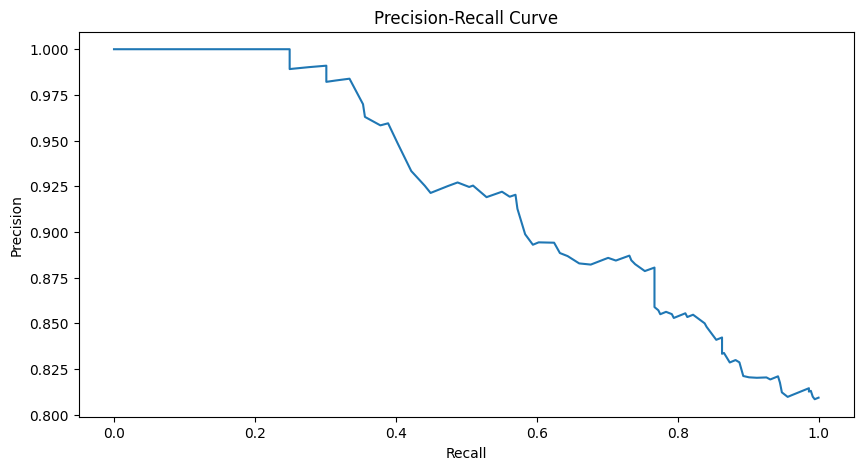

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get the probabilities of the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Get the precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold that gives the best F1 score
f1_scores = 2*recall*precision / (recall + precision)
best_threshold = thresholds[np.argmax(f1_scores)]

# Use this threshold to predict the classes
y_pred = (y_scores > best_threshold).astype(int)

# Print the precision-recall curve for the model 
plt.figure(figsize=(10, 5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [37]:
node_features

,degree,closeness,betweenness,clustering,eigenvector,pagerank,average_neighbor_degree,graph_labels
256,115,0.433474,0.014528,0.311365,0.048093,0.001760,59.573913,1
1152,44,0.403698,0.000000,1.000000,0.026378,0.000625,78.136364,1
8,97,0.442844,0.003480,0.394759,0.045533,0.001327,67.309278,1
3208,44,0.403698,0.000000,1.000000,0.026378,0.000625,78.136364,1
649,89,0.446733,0.005614,0.463994,0.045490,0.001195,70.876404,1
...,...,...,...,...,...,...,...,...
6642,34,0.394310,0.000000,1.000000,0.016105,0.000529,69.205882,0
5113,34,0.394310,0.000000,1.000000,0.016105,0.000529,69.205882,0
1135,7,0.336017,0.000000,1.000000,0.002190,0.000217,46.857143,1
6770,7,0.336017,0.000000,1.000000,0.002190,0.000217,46.857143,0


In [42]:
# Now can we try to make different combinaisons of features to see what has the best accuracy and F1 score and store the result in a datafram in order to print the best combinaison
from sklearn.metrics import f1_score

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['features', 'accuracy', 'f1_score'])

# Iterate over all possible combinations of features
for i in range(1, len(node_features.columns) - 1):
    for features in combinations(node_features.columns[:-1], i):
        print(features)
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(node_features[list(features)], node_features['graph_labels'], test_size=0.3, random_state=seed)

        # Train a simple model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate the accuracy and F1 score of the model
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

       # Append the results to the DataFrame
        results.loc[len(results)] = [features, accuracy, f1]
        print(accuracy, f1)

# Print the results
results.sort_values('f1_score', ascending=False).head(10)

# Print the best combinaison
best_combinaison = results.sort_values('f1_score', ascending=False).iloc[0]
print("Best combinaison of features:")
print(best_combinaison['features'])
print("Accuracy:", best_combinaison['accuracy'])
print("F1 Score:", best_combinaison['f1_score'])


('degree',)
0.8093126385809313 0.8946078431372549
('closeness',)
0.8093126385809313 0.8946078431372549
('betweenness',)
0.8093126385809313 0.8946078431372549
('clustering',)
0.8093126385809313 0.8946078431372549
('eigenvector',)
0.8093126385809313 0.8946078431372549
('pagerank',)
0.8093126385809313 0.8946078431372549
('average_neighbor_degree',)
0.8048780487804879 0.8918918918918918
('degree', 'closeness')
0.8093126385809313 0.8946078431372549
('degree', 'betweenness')
0.8093126385809313 0.8946078431372549
('degree', 'clustering')
0.8093126385809313 0.8946078431372549
('degree', 'eigenvector')
0.8093126385809313 0.8946078431372549
('degree', 'pagerank')
0.8093126385809313 0.8946078431372549
('degree', 'average_neighbor_degree')
0.8093126385809313 0.8946078431372549
('closeness', 'betweenness')
0.8093126385809313 0.8946078431372549
('closeness', 'clustering')
0.8093126385809313 0.8946078431372549
('closeness', 'eigenvector')
0.8093126385809313 0.8946078431372549
('closeness', 'pagerank'